# importing necessary libries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import KFold , cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
import plotly.express as px

In [2]:
df= pd.read_csv('car_purchasing.csv',encoding ='latin-1')

In [3]:
df.head()

customer name                                    customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        country  gender        age  annual Salary  credit card debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     net worth  car purchase amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773          42925.70921  
3  548599.0524          67422.36313  
4  560304.0671          55915.46248

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [5]:
df.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

<AxesSubplot:>

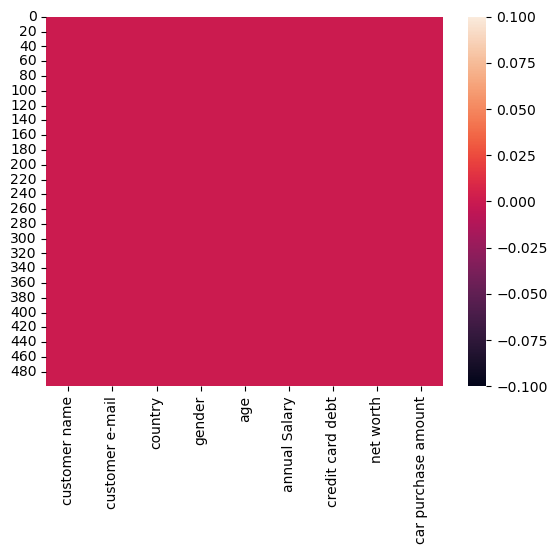

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.describe()

gender         age  annual Salary  credit card debt  \
count  500.000000  500.000000     500.000000        500.000000   
mean     0.506000   46.241674   62127.239608       9607.645049   
std      0.500465    7.978862   11703.378228       3489.187973   
min      0.000000   20.000000   20000.000000        100.000000   
25%      0.000000   40.949969   54391.977195       7397.515792   
50%      1.000000   46.049901   62915.497035       9655.035568   
75%      1.000000   51.612263   70117.862005      11798.867487   
max      1.000000   70.000000  100000.000000      20000.000000   

            net worth  car purchase amount  
count      500.000000           500.000000  
mean    431475.713625         44209.799218  
std     173536.756340         10773.178744  
min      20000.000000          9000.000000  
25%     299824.195900         37629.896040  
50%     426750.120650         43997.783390  
75%     557324.478725         51254.709517  
max    1000000.000000         80000.000000

In [8]:
df.describe(include="object").T

count unique  \
customer name     500    498   
customer e-mail   500    500   
country           500    211   

                                                               top freq  
customer name                                                 Seth    2  
customer e-mail  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu    1  
country                                                     Israel    6

In [9]:
df.drop('customer name',axis=1,inplace=True)
df.drop('customer e-mail',axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              500 non-null    object 
 1   gender               500 non-null    int64  
 2   age                  500 non-null    float64
 3   annual Salary        500 non-null    float64
 4   credit card debt     500 non-null    float64
 5   net worth            500 non-null    float64
 6   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.5+ KB


In [11]:
plt.figure(figsize=(7,5))
px.box(data_frame=df, y="annual Salary")

<Figure size 700x500 with 0 Axes>

In [12]:
#find the limits
upper_limit=df["annual Salary"].mean() + 3*df["annual Salary"].std()
lower_limit=df["annual Salary"].mean() - 3*df["annual Salary"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  97237.37429088238
lower limit:  27017.10492423758


In [13]:
#find the outliers
outliers_df=df.loc[(df["annual Salary"]> upper_limit) |(df["annual Salary"] < lower_limit)]
outliers_df.shape

(2, 7)

In [14]:
#remove outliers from the data
newdf =df.loc[(df["annual Salary"]< upper_limit) & (df["annual Salary"] > lower_limit)]

print("the outliers: ",len(df)-len(newdf))

the outliers:  2


In [15]:
plt.figure(figsize=(7,5))
px.box(data_frame=newdf, y="annual Salary")

<Figure size 700x500 with 0 Axes>

In [16]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              498 non-null    object 
 1   gender               498 non-null    int64  
 2   age                  498 non-null    float64
 3   annual Salary        498 non-null    float64
 4   credit card debt     498 non-null    float64
 5   net worth            498 non-null    float64
 6   car purchase amount  498 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 31.1+ KB


In [17]:
output_file = "salesdata.csv"
newdf.to_csv(output_file,index=False)

In [18]:
new = pd.read_csv("salesdata.csv")
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              498 non-null    object 
 1   gender               498 non-null    int64  
 2   age                  498 non-null    float64
 3   annual Salary        498 non-null    float64
 4   credit card debt     498 non-null    float64
 5   net worth            498 non-null    float64
 6   car purchase amount  498 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.4+ KB


In [19]:
f= df['gender'].value_counts()
gender_female=f[1]
gender_male=f[0]
print('The number of male are',f[1])
print('The number of female are',f[0])

The number of male are 253
The number of female are 247


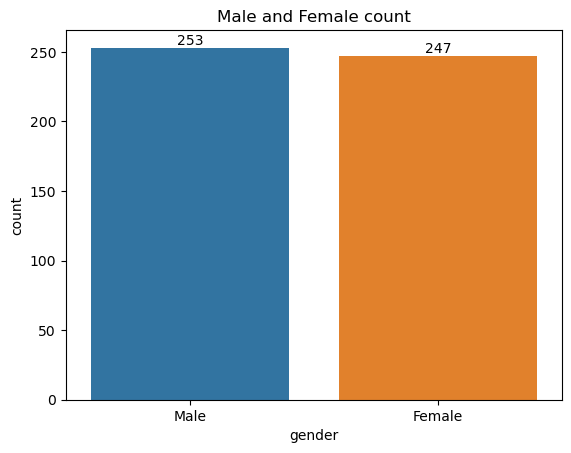

In [20]:
ax = sns.countplot(x='gender',data=df,order=df['gender'].value_counts().index)
plt.title("Male and Female count")
plt.xticks([0,1],['Male','Female'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2.,p.get_height()),ha = 'center',va='bottom')
plt.show()    


# From the above chart, there are 253 male and 247 female in the dataset

In [21]:
df.describe()

gender         age  annual Salary  credit card debt  \
count  500.000000  500.000000     500.000000        500.000000   
mean     0.506000   46.241674   62127.239608       9607.645049   
std      0.500465    7.978862   11703.378228       3489.187973   
min      0.000000   20.000000   20000.000000        100.000000   
25%      0.000000   40.949969   54391.977195       7397.515792   
50%      1.000000   46.049901   62915.497035       9655.035568   
75%      1.000000   51.612263   70117.862005      11798.867487   
max      1.000000   70.000000  100000.000000      20000.000000   

            net worth  car purchase amount  
count      500.000000           500.000000  
mean    431475.713625         44209.799218  
std     173536.756340         10773.178744  
min      20000.000000          9000.000000  
25%     299824.195900         37629.896040  
50%     426750.120650         43997.783390  
75%     557324.478725         51254.709517  
max    1000000.000000         80000.000000

In [22]:
grouped1 = new.groupby(['country','age','gender']).size().unstack()
sum_of_male_female_age = grouped1.sum(axis=1).reset_index(name='Gender_Total')

sum_of_male_female_age

country        age  Gender_Total
0      Afghanistan  51.084811           1.0
1      Afghanistan  57.134576           1.0
2          Algeria  37.269332           1.0
3          Algeria  42.144445           1.0
4          Algeria  43.152897           1.0
..             ...        ...           ...
493       Zimbabwe  55.989615           1.0
494         marlal  46.731152           1.0
495  Åland Islands  40.083317           1.0
496  Åland Islands  45.341289           1.0
497  Åland Islands  46.342741           1.0

[498 rows x 3 columns]

In [23]:
def all_age(series):
    return list(series)
count =0
result_data = []
for i in range(0,len(sum_of_male_female_age)):
    if sum_of_male_female_age['Gender_Total'].iloc[i] >=0:
        count+=1
        country = sum_of_male_female_age['country'].iloc[i]
        age=sum_of_male_female_age['age'].iloc[i]
        gender_total=sum_of_male_female_age['Gender_Total'].iloc[1]
        
        result_data.append([country,age,gender_total])
result_df=pd.DataFrame(result_data,columns=['country','age','Gender_Total'])
result_df_country = result_df.groupby(['country']).agg({'age':all_age,'Gender_Total':'count'})
result_df_country_sorted= result_df_country.sort_values(by='Gender_Total',ascending = False)
print(result_df_country_sorted)
print("Total count",count)

                                                                                            age  \
country                                                                                           
Bolivia                                       [29.59907959, 35.37515645, 45.49732494, 46.245...   
Israel                                        [42.91579507, 43.3868909, 44.31436254, 46.2708...   
Mauritania                                    [38.93027639, 41.17366372, 41.37223373, 41.705...   
Grenada                                       [36.51447117, 40.99660693, 43.50671123, 46.566...   
Equatorial Guinea                             [47.71401166, 48.93654638, 51.22247207, 51.361...   
...                                                                                         ...   
Bonaire, Sint Eustatius and Saba                                                  [48.25655639]   
Kenya                                                                             [50.41432737]   
Kazakhstan

# From the above dataframe Bolivia,Israel and Mauritania has ranked 1 for car purchasing

In [24]:
output_file = "country_data.csv"
result_df_country_sorted.to_csv(output_file,index=False)

In [25]:
new = pd.read_csv("salesdata.csv")
new.info()
new_country = pd.read_csv('country_data.csv')
new_country.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              498 non-null    object 
 1   gender               498 non-null    int64  
 2   age                  498 non-null    float64
 3   annual Salary        498 non-null    float64
 4   credit card debt     498 non-null    float64
 5   net worth            498 non-null    float64
 6   car purchase amount  498 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.4+ KB


age  Gender_Total
0  [29.59907959, 35.37515645, 45.49732494, 46.245...             6
1  [42.91579507, 43.3868909, 44.31436254, 46.2708...             6
2  [38.93027639, 41.17366372, 41.37223373, 41.705...             6
3  [36.51447117, 40.99660693, 43.50671123, 46.566...             5
4  [47.71401166, 48.93654638, 51.22247207, 51.361...             5

# from the above we find the range of age of people who bought cars for a particular country

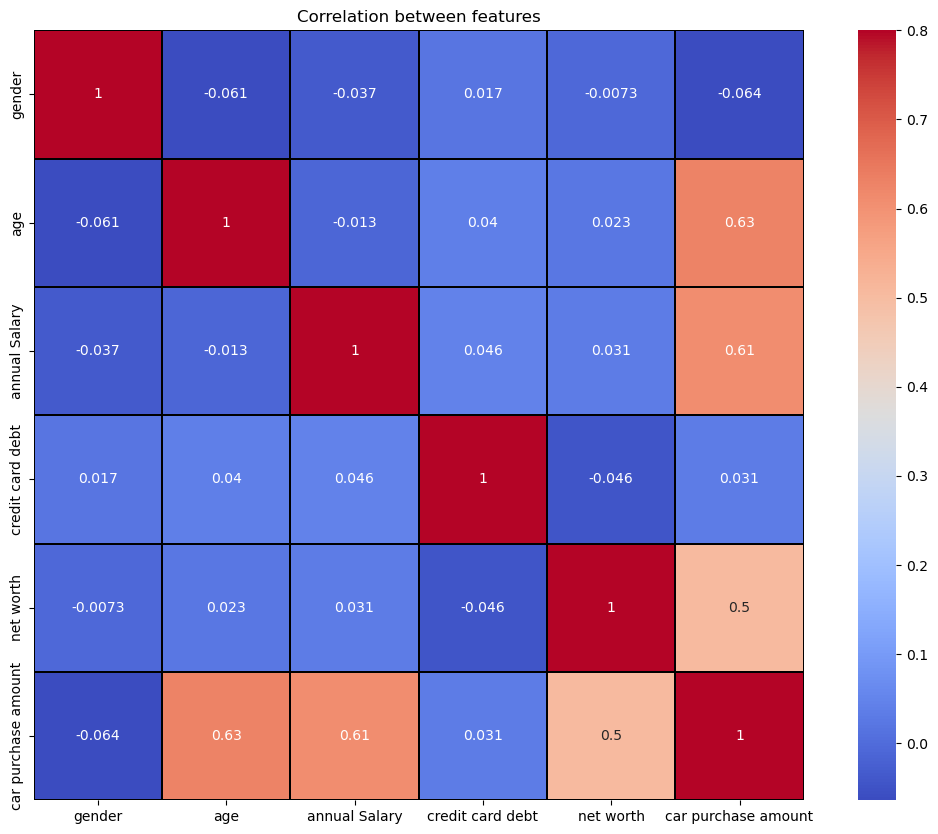

In [26]:
corr= new.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='coolwarm',linecolor="black")
plt.title('Correlation between features')
plt.show()

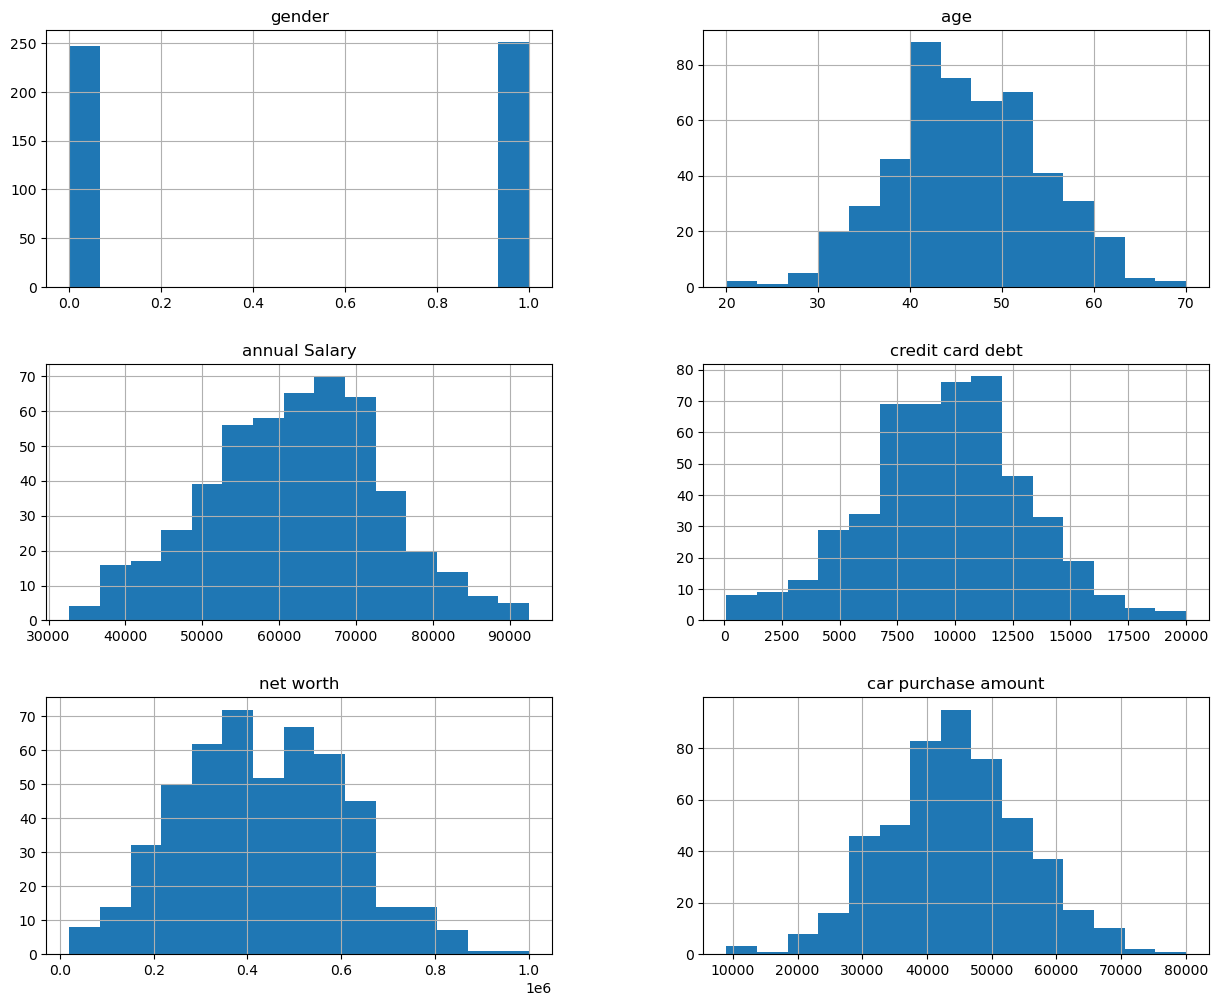

In [27]:
new.hist(figsize=(15,12),bins = 15)

plt.show()

In [28]:
import category_encoders as ce

In [29]:
country_df = pd.DataFrame(new['country'])
country_df

country
0        Bulgaria
1          Belize
2         Algeria
3    Cook Islands
4          Brazil
..            ...
493         Nepal
494      Zimbabwe
495   Philippines
496      Botswana
497        marlal

[498 rows x 1 columns]

In [30]:
encoder=ce.BinaryEncoder(cols=['country'])
country_encoded = encoder.fit_transform(country_df)
country_encoded

country_0  country_1  country_2  country_3  country_4  country_5  \
0            0          0          0          0          0          0   
1            0          0          0          0          0          0   
2            0          0          0          0          0          0   
3            0          0          0          0          0          1   
4            0          0          0          0          0          1   
..         ...        ...        ...        ...        ...        ...   
493          0          1          0          1          1          1   
494          0          1          1          1          1          1   
495          1          0          1          0          0          0   
496          0          0          0          1          1          1   
497          1          1          0          1          0          0   

     country_6  country_7  
0            0          1  
1            1          0  
2            1          1  
3            0          0  
4            0          1  
..         ...        ...  
493          1          0  
494          0          0  
495          0          0  
496          1          1  
497          1          0  

[498 rows x 8 columns]

In [31]:
new = new.drop(['country'],axis=1)
result =pd.concat([new,country_encoded],axis=1)
result

gender        age  annual Salary  credit card debt    net worth  \
0         0  41.851720    62812.09301      11609.380910  238961.2505   
1         0  40.870623    66646.89292       9572.957136  530973.9078   
2         1  43.152897    53798.55112      11160.355060  638467.1773   
3         1  58.271369    79370.03798      14426.164850  548599.0524   
4         1  57.313749    59729.15130       5358.712177  560304.0671   
..      ...        ...            ...               ...          ...   
493       0  41.462515    71942.40291       6995.902524  541670.1016   
494       1  37.642000    56039.49793      12301.456790  360419.0988   
495       1  53.943497    68888.77805      10611.606860  764531.3203   
496       1  59.160509    49811.99062      14013.034510  337826.6382   
497       1  46.731152    61370.67766       9391.341628  462946.4924   

     car purchase amount  country_0  country_1  country_2  country_3  \
0            35321.45877          0          0          0          0   
1            45115.52566          0          0          0          0   
2            42925.70921          0          0          0          0   
3            67422.36313          0          0          0          0   
4            55915.46248          0          0          0          0   
..                   ...        ...        ...        ...        ...   
493          48901.44342          0          1          0          1   
494          31491.41457          0          1          1          1   
495          64147.28888          1          0          1          0   
496          45442.15353          0          0          0          1   
497          45107.22566          1          1          0          1   

     country_4  country_5  country_6  country_7  
0            0          0          0          1  
1            0          0          1          0  
2            0          0          1          1  
3            0          1          0          0  
4            0          1          0          1  
..         ...        ...        ...        ...  
493          1          1          1          0  
494          1          1          0          0  
495          0          0          0          0  
496          1          1          1          1  
497          0          0          1          0  

[498 rows x 14 columns]

In [32]:
X = result.drop(["car purchase amount"], axis=1)
y = result["car purchase amount"]


In [33]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print(X_train,y_train)

     gender        age  annual Salary  credit card debt    net worth  \
56        1  43.030881    51419.50777      11331.204470  636407.1148   
227       0  45.095155    63687.49880      13421.368210  358615.9327   
280       0  41.863615    51539.93045       6932.950306  371355.6935   
485       0  43.365470    50051.14039        893.235341  347177.8367   
220       0  47.450949    61063.35631      12066.265710  509543.0859   
..      ...        ...            ...               ...          ...   
106       1  30.349459    61922.89710      10366.503260  323453.2022   
270       1  45.194794    74173.39239      11315.596260  521404.2386   
348       0  42.120080    38453.86033      15283.417520  320834.0102   
435       0  51.525327    48746.71666       3923.407178  217188.4056   
102       0  48.476396    63975.06090      10614.854490  891439.8761   

     country_0  country_1  country_2  country_3  country_4  country_5  \
56           0          0          1          1          1    

# Linear Regression Model 

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [37]:
reg_pred=regression.predict(X_test)

Text(0, 0.5, 'Predicted')

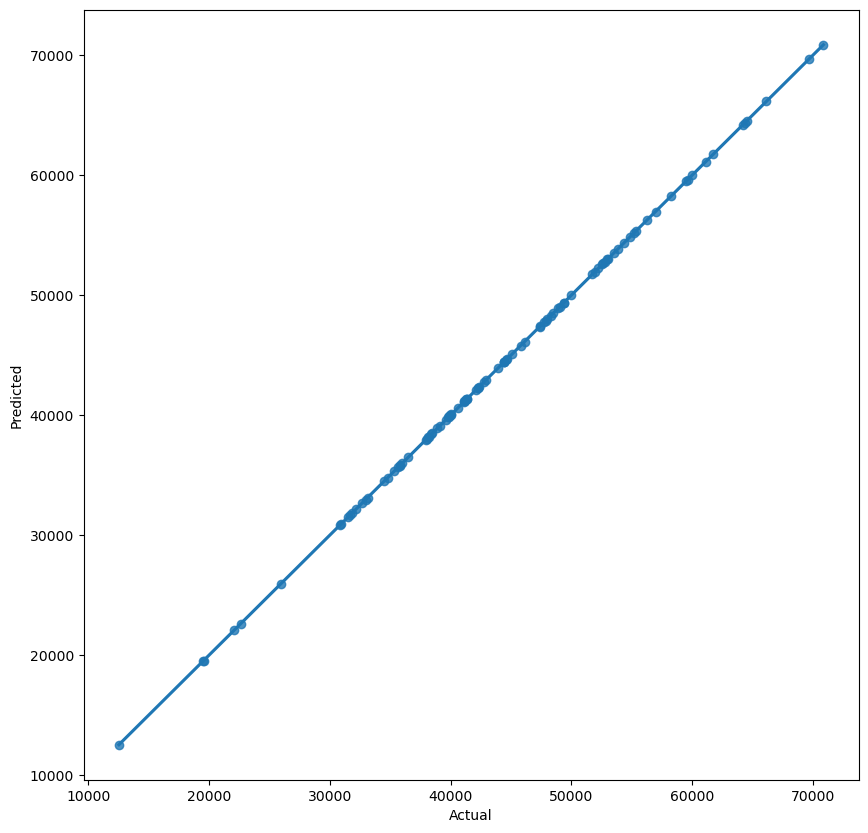

In [38]:
import seaborn as sns
plt.rcParams['figure.figsize'] =[10,10]
sns.regplot(x=y_test,y=reg_pred,ci=None, data=df)
plt.xlabel('Actual');
plt.ylabel('Predicted')

In [39]:
from sklearn.metrics import r2_score

In [40]:
score=r2_score(reg_pred,y_test)

In [41]:
print(" The accuracy of the model is :",score)
score_linear = score*100

 The accuracy of the model is : 0.9999999827355437


In [42]:
from mpl_toolkits.mplot3d import axes3d

In [43]:
coef=regression.coef_
intercept=regression.intercept_
xs=np.arange(0,500,20)
ys=np.arange(0,100,20)
xs,ys=np.meshgrid(xs,ys)

           
           
zs=xs*coef[0]+ys*coef[1]+intercept


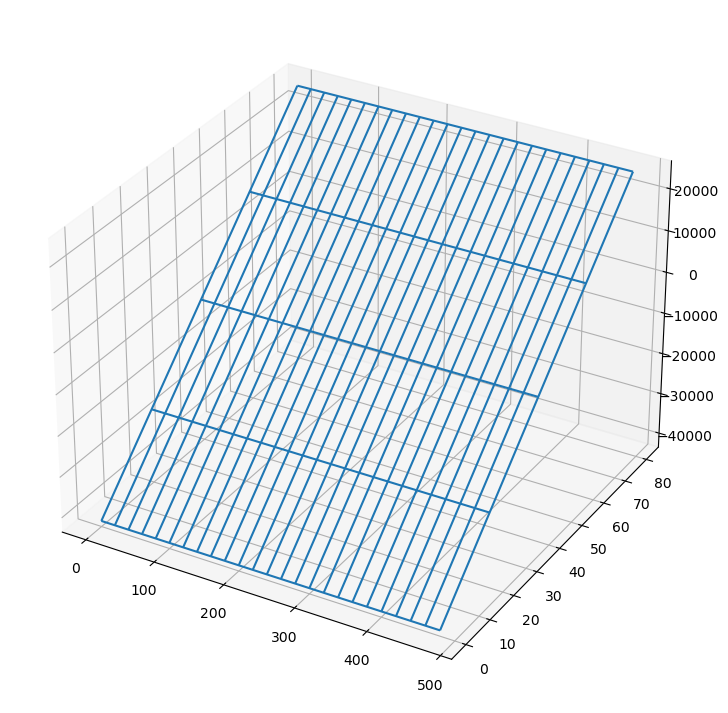

In [44]:
fig=plt.figure(figsize=(14,9))
ax=plt.axes(projection='3d')
ax.plot_wireframe(xs,ys,zs,rstride=1,cstride=1)
    
plt.show()

# Directly fit the values of X,y in Linear regression model

In [46]:
model=LinearRegression().fit(X,y)
r_sq=model.score(X,y)
print('The accuracy of the model is :',r_sq)

The accuracy of the model is : 0.9999999812045197


In [47]:
importance = pd.DataFrame(data={'Attribute': X_train.columns,'Importance': model.coef_})
importance = importance.sort_values(by='Importance',ascending = False)


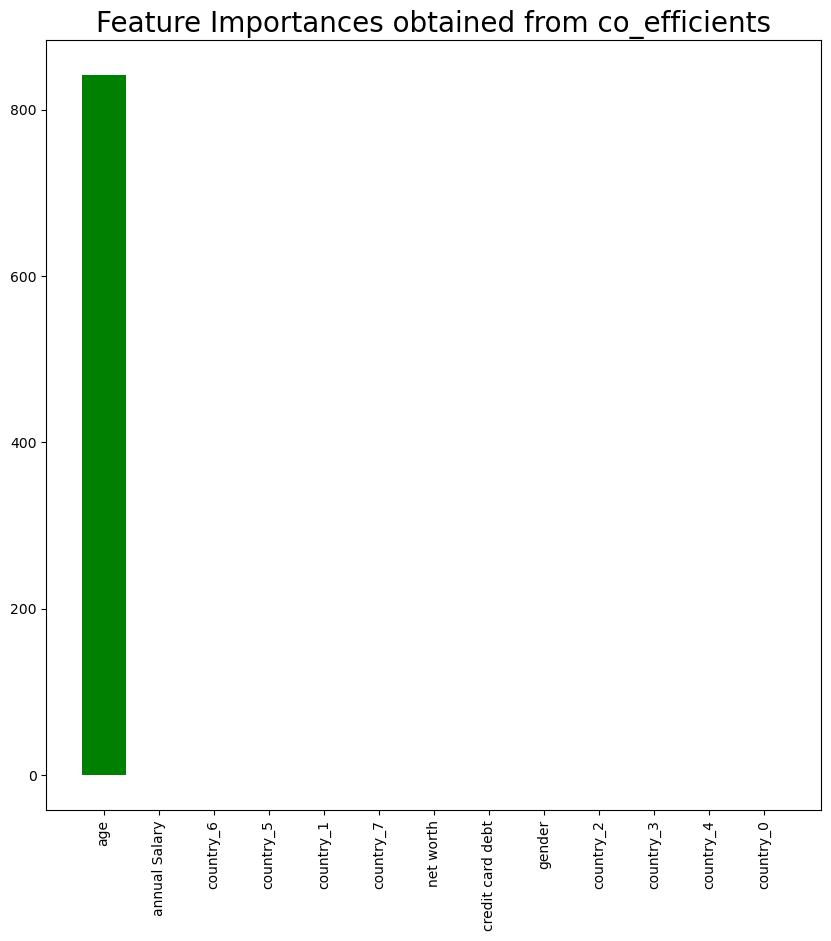

In [48]:
plt.bar(x=importance['Attribute'],height = importance['Importance'],color = 'Green')
plt.title('Feature Importances obtained from co_efficients', size = 20)
plt.xticks(rotation = 'vertical')
plt.show()
        

# From the above table the only one feature 'age' is the most significant above all other features

# Ridge and Lasso regression model

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [51]:
ridge_regressor=Lasso()

In [52]:
ridge_regressor

Lasso()

In [53]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [54]:
print(ridgecv.best_params_)

{'alpha': 1}


In [55]:
ridge_pred=ridgecv.predict(X_test)

Text(0, 0.5, 'Predicted')

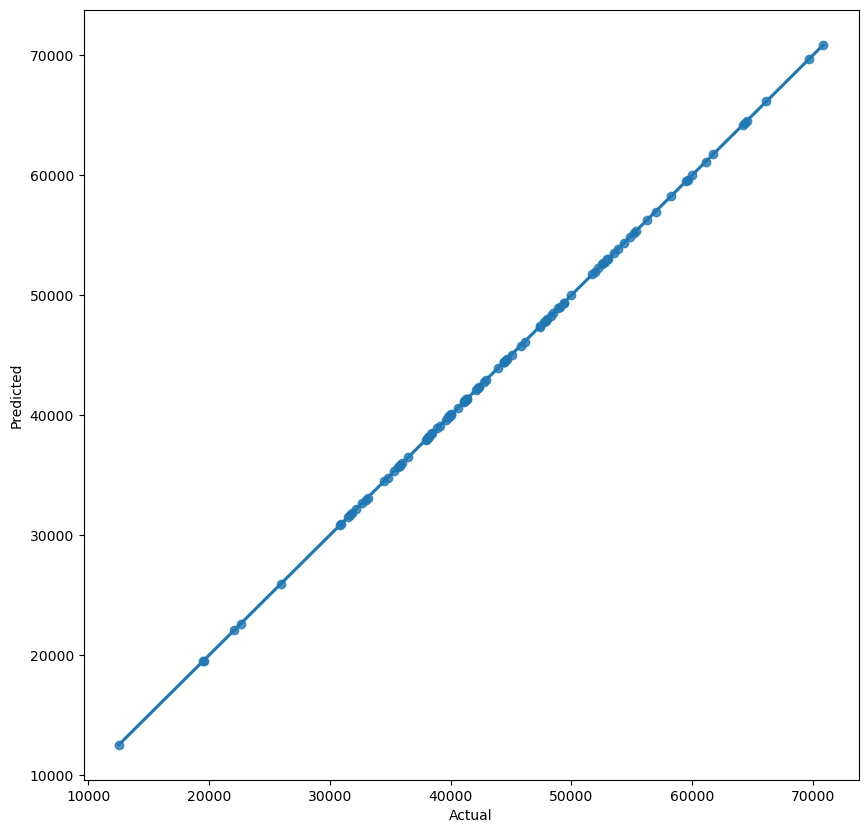

In [56]:
import seaborn as sns
sns.regplot(x=y_test,y=ridge_pred,ci=None, data=df)
plt.xlabel('Actual');
plt.ylabel('Predicted')

# Finding the accuracy for Lasso regressor

In [58]:
score=r2_score(ridge_pred,y_test)

In [59]:
print("The accuracy of the model is:",score)
score_lasso=score*100

The accuracy of the model is: 0.9999999825850181


# Polynomial Regression

In [60]:
from sklearn.preprocessing import PolynomialFeatures

In [61]:
transformer=PolynomialFeatures(degree=2, include_bias = True)

In [62]:
transformer.fit(X)

PolynomialFeatures()

In [63]:
X_=transformer.transform(X)

In [64]:
model=LinearRegression().fit(X_,y)

In [65]:
r_sq=model.score(X_,y)

In [66]:
print("accurancy of the model is:",r_sq)
score_poly = r_sq*100

accurancy of the model is: 0.9999999846519727


# Advanced linear regression model using constant

In [67]:
import statsmodels.api as sm

In [68]:
x=sm.add_constant(X)

In [69]:
model = sm.OLS(y,x)

In [70]:
results = model.fit()

In [71]:
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     car purchase amount   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 1.981e+09
Date:                 Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                         09:58:16   Log-Likelihood:                -896.22
No. Observations:                  498   AIC:                             1820.
Df Residuals:                      484   BIC:                             1879.
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.215e+04   

# Decision tree algorithm

In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [74]:
regressor = DecisionTreeRegressor(max_depth =3 ,random_state=100,min_samples_leaf=1)
model =regressor.fit(X_train,y_train)

[Text(0.5, 0.875, 'X[2] <= 60931.504\nsquared_error = 111767277.959\nsamples = 398\nvalue = 44230.427'),
 Text(0.25, 0.625, 'X[1] <= 42.584\nsquared_error = 76557207.049\nsamples = 168\nvalue = 37673.41'),
 Text(0.125, 0.375, 'X[4] <= 333731.641\nsquared_error = 48403213.481\nsamples = 57\nvalue = 30286.07'),
 Text(0.0625, 0.125, 'squared_error = 41249360.794\nsamples = 22\nvalue = 25116.513'),
 Text(0.1875, 0.125, 'squared_error = 25542942.322\nsamples = 35\nvalue = 33535.506'),
 Text(0.375, 0.375, 'X[4] <= 491653.188\nsquared_error = 48600162.984\nsamples = 111\nvalue = 41466.909'),
 Text(0.3125, 0.125, 'squared_error = 32277751.93\nsamples = 67\nvalue = 37761.861'),
 Text(0.4375, 0.125, 'squared_error = 20722040.765\nsamples = 44\nvalue = 47108.686'),
 Text(0.75, 0.625, 'X[1] <= 46.24\nsquared_error = 83142229.837\nsamples = 230\nvalue = 49019.9'),
 Text(0.625, 0.375, 'X[4] <= 426888.188\nsquared_error = 46291143.429\nsamples = 116\nvalue = 43585.261'),
 Text(0.5625, 0.125, 'squared

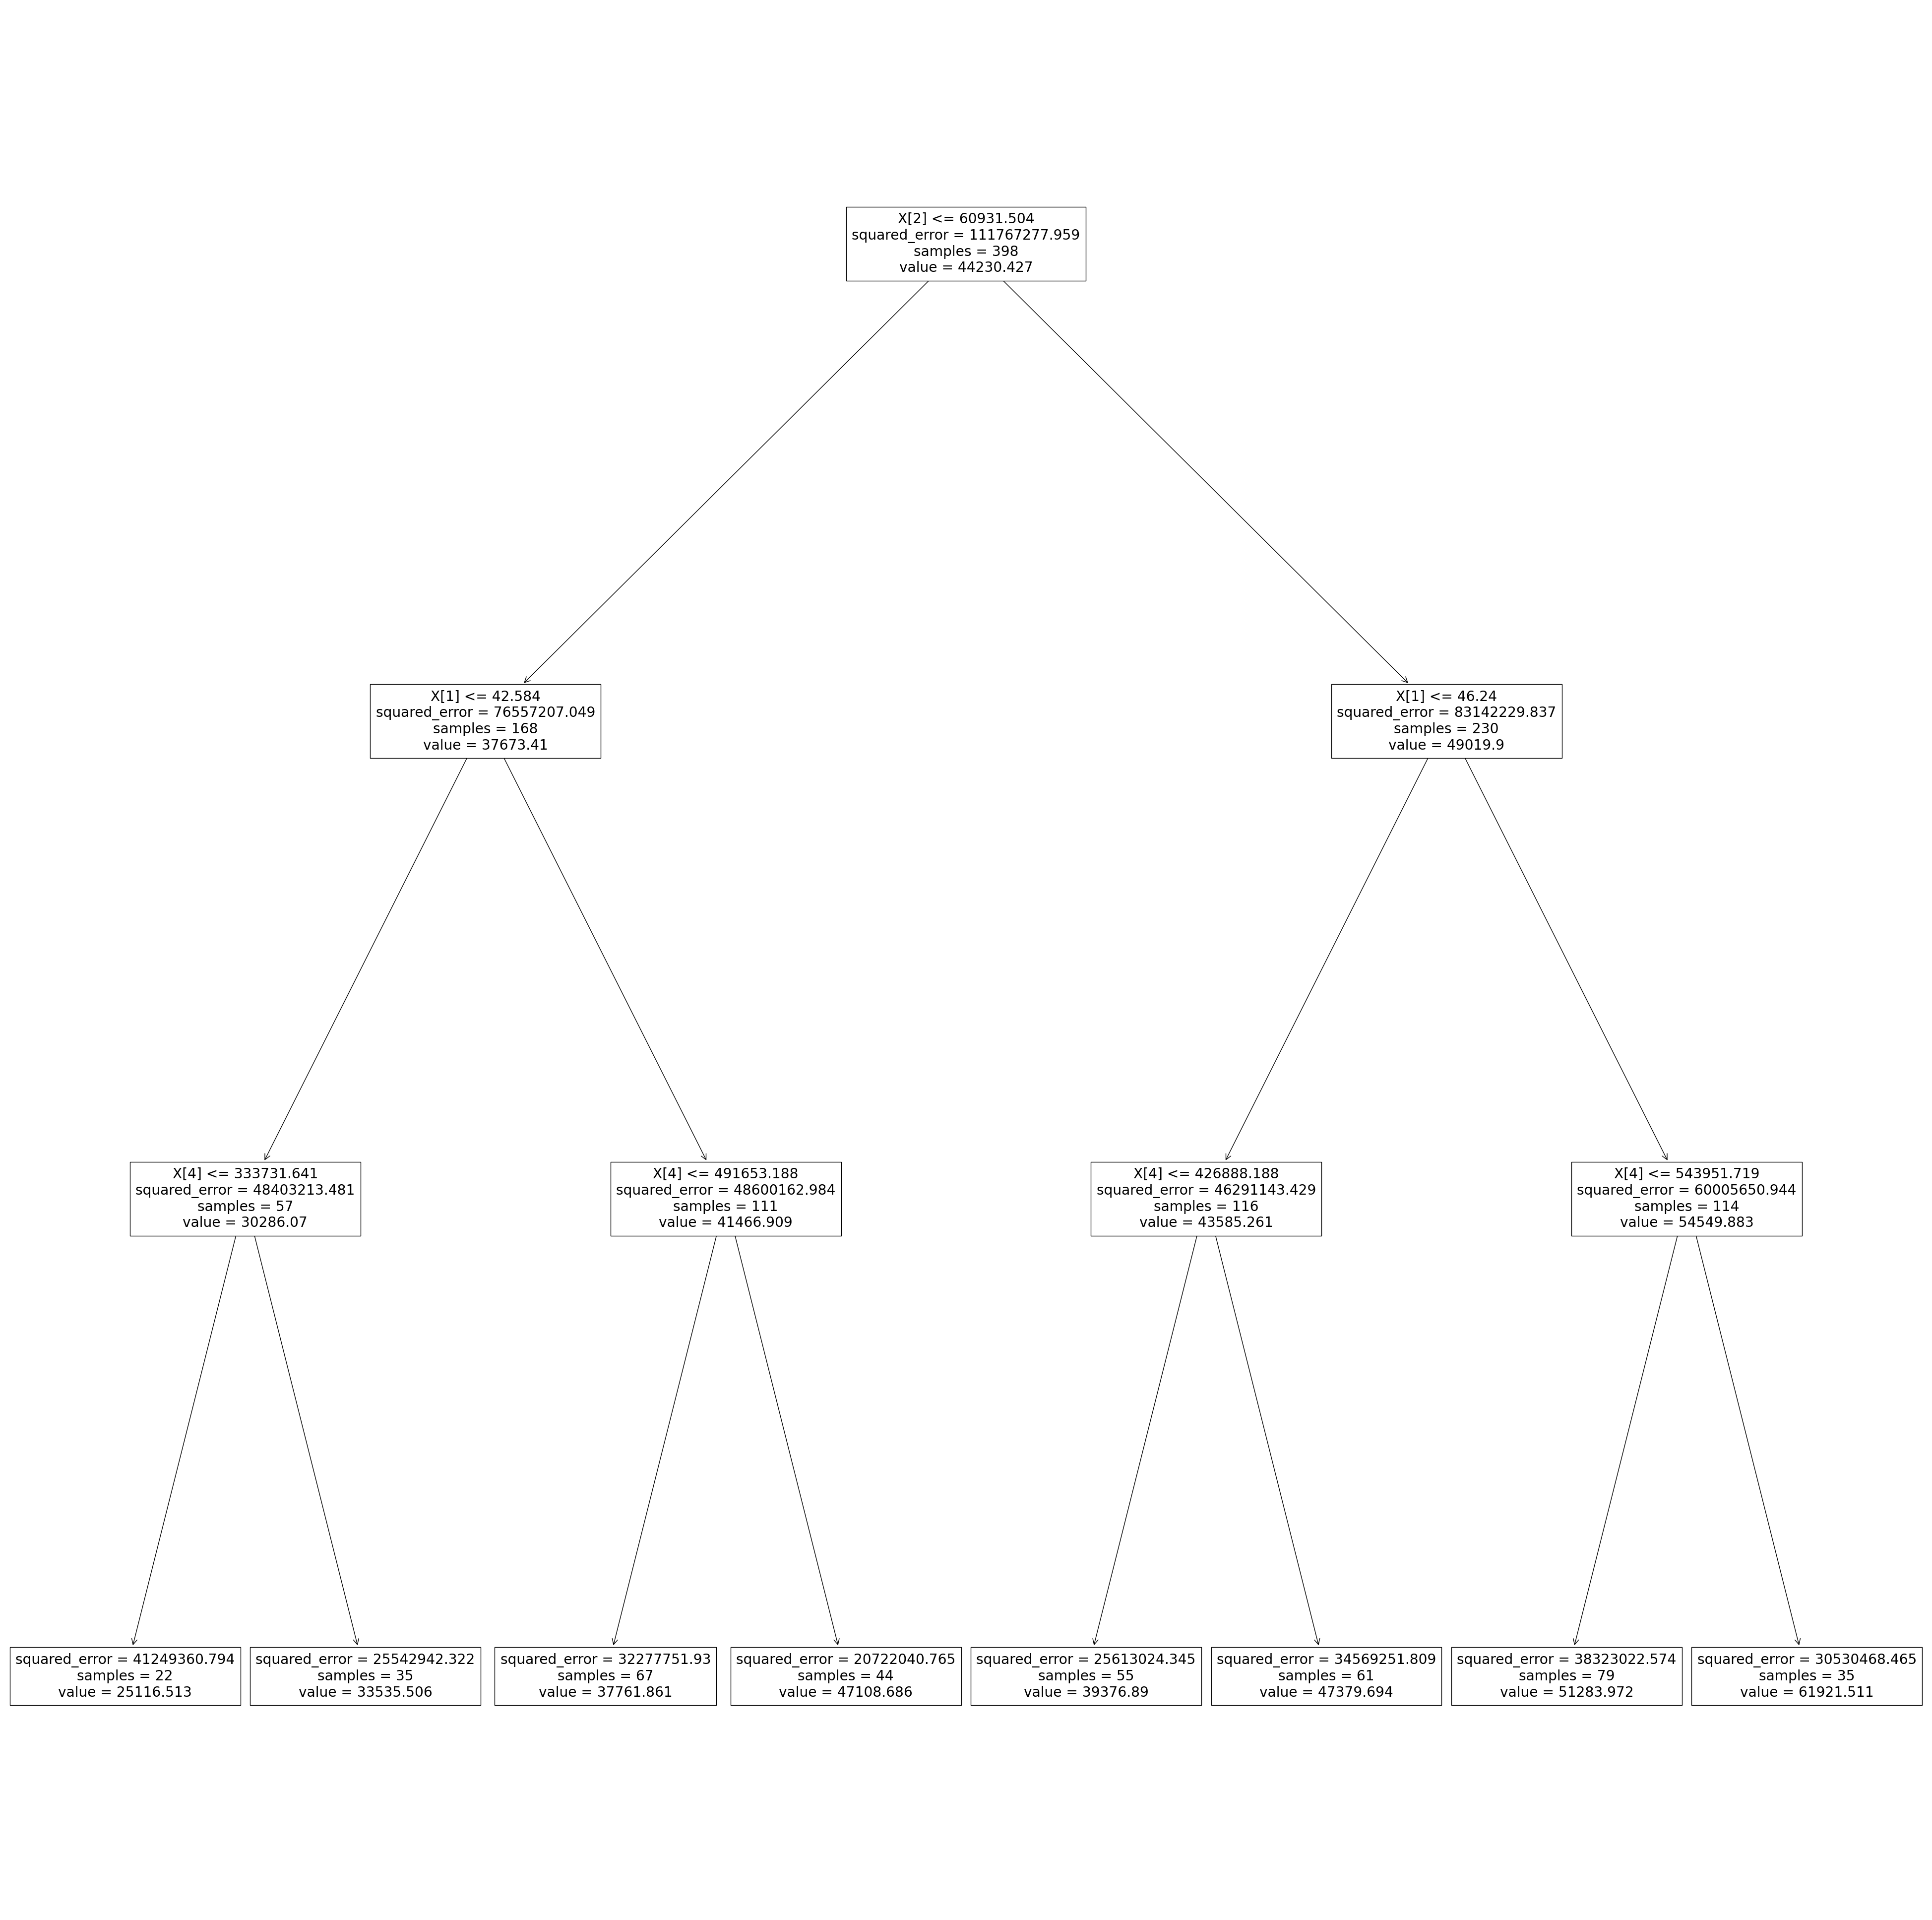

In [75]:
plt.figure(figsize=(50,50))
tree.plot_tree(regressor)

In [76]:
y_pred = regressor.predict(X_test)

Text(0, 0.5, 'Predicted')

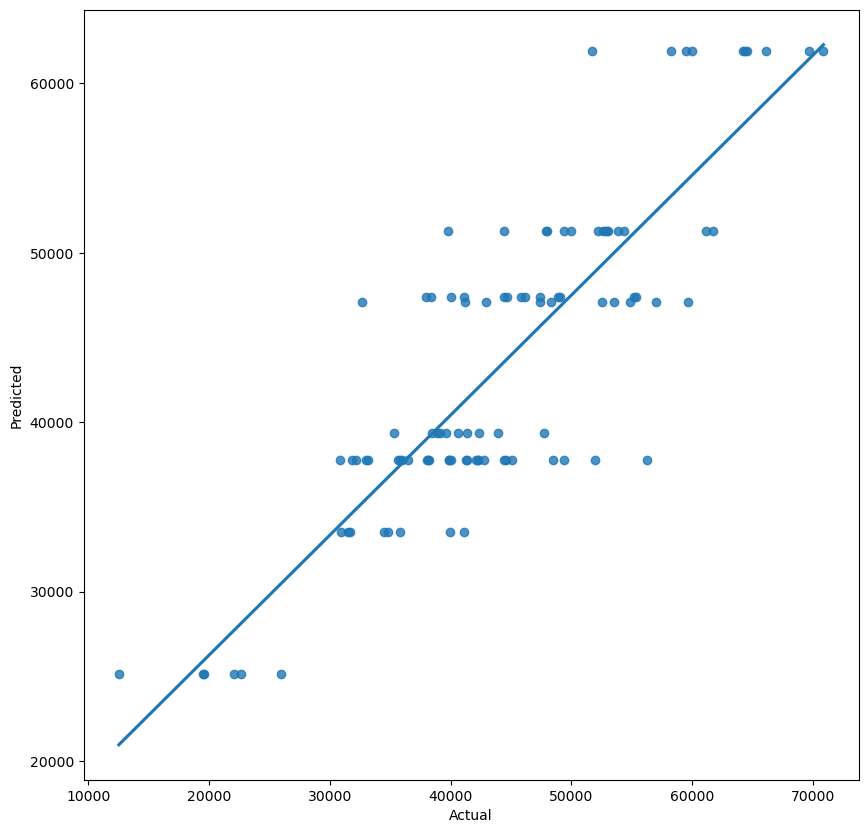

In [77]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,ci=None, data=df)
plt.xlabel('Actual');
plt.ylabel('Predicted')

In [78]:
from sklearn.metrics import r2_score

In [79]:
reg_pred=regressor.predict(X_test)
score=r2_score(reg_pred,y_test)

In [80]:
print("The accuracy of the model is:",score)
score_DT = score*100

The accuracy of the model is: 0.588586202339507


# Random forest regression

In [81]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state = 0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [82]:
from sklearn import metrics
print('Root mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root mean Squared Error: 2588.3885331787683


Text(0, 0.5, 'Predicted')

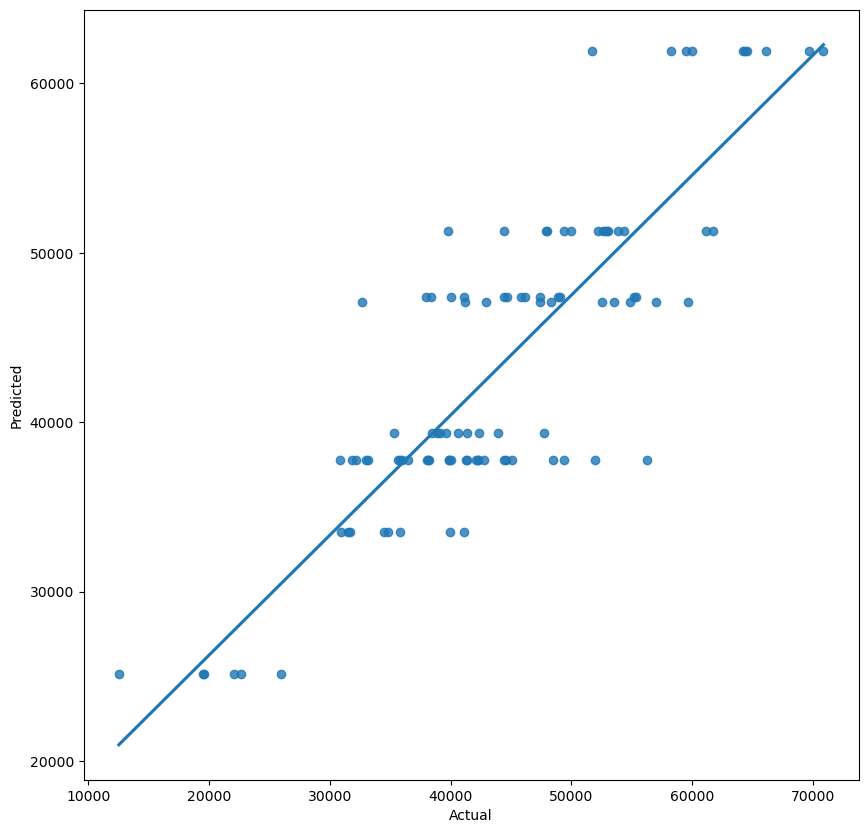

In [83]:
import seaborn as sns
sns.regplot(x=y_test,y=reg_pred,ci=None, data=df)
plt.xlabel('Actual');
plt.ylabel('Predicted')

In [84]:
reg_pred=regressor.predict(X_test)
score=r2_score(reg_pred,y_test)

In [85]:
print("The accuracy of the model is:",score)
score_RF = score*100

The accuracy of the model is: 0.927600047300542
